In [1]:
import nltk

# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [2]:
# !pip install tensorflow

In [3]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
import json
import pickle
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import random

In [4]:
words = []
classes = []
documents = []

ignore_words = ['?', '!', '-', '_', '.', ',', '&', '()']

data_file = open('dataset.json', encoding='utf-8').read()

intents = json.loads(data_file)

In [5]:
for intent in intents['chatbot']:
    for pattern in intent['intent']:
        #tokenizing
        word_tokenize = nltk.word_tokenize(pattern)
        words.extend(word_tokenize)
        #add to docs
        
        documents.append((word_tokenize, intent['tag']))
        
        if intent['tag'] not in classes:
            classes.append(intent['tag'])
            
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
    
words = (sorted(list(set(words))))
classes = sorted(list(set(classes)))

In [6]:
#saving the words

pickle.dump(words,open('chat_words.pkl', "wb"))
pickle.dump(classes,open('chat_classes.pkl', "wb"))

In [7]:
#creating bag of words and spliting data into x and y

training = []
output_entry = [0] * len(classes)

for doc in documents:
    bag = []
    pattern_words = doc[0]
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
        output_row = list(output_entry)
        output_row[classes.index(doc[1])] = 1
        
        training.append([bag, output_row])
        

random.shuffle((training))
training = np.array(training)
train_x = list(training[:,0])
train_y = list(training[:,1])

print('training data created')

training data created


C:\Users\ACER NITRO\AppData\Local\Temp\ipykernel_16756\1211054309.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(training)


In [8]:
#initializing the model
model = Sequential()

model.add(Dense(100, input_shape=(len(train_x[0]),), activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(35, activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation = 'softmax'))


# sgd = SGD(learning_rate=0.04, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [9]:
#fitting and saving model

chats = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)

Epoch 1/200
10320/10320 [==============================] - 9s 820us/step - loss: 1.2017 - accuracy: 0.6512
Epoch 2/200
10320/10320 [==============================] - 8s 790us/step - loss: 0.5641 - accuracy: 0.8059
Epoch 3/200
10320/10320 [==============================] - 9s 889us/step - loss: 0.4832 - accuracy: 0.8290
Epoch 4/200
10320/10320 [==============================] - 8s 744us/step - loss: 0.4376 - accuracy: 0.8441
Epoch 5/200
10320/10320 [==============================] - 9s 841us/step - loss: 0.4126 - accuracy: 0.8534
Epoch 6/200
10320/10320 [==============================] - 8s 732us/step - loss: 0.3871 - accuracy: 0.8625
Epoch 7/200
10320/10320 [==============================] - 7s 714us/step - loss: 0.3687 - accuracy: 0.8693
Epoch 8/200
10320/10320 [==============================] - 7s 705us/step - loss: 0.3644 - accuracy: 0.8720
Epoch 9/200
10320/10320 [==============================] - 7s 704us/step - loss: 0.3592 - accuracy: 0.8754
Epoch 10/200
10320/10320 [===========

10320/10320 [==============================] - 7s 700us/step - loss: 0.3351 - accuracy: 0.9004
Epoch 77/200
10320/10320 [==============================] - 7s 707us/step - loss: 0.3437 - accuracy: 0.8997
Epoch 78/200
10320/10320 [==============================] - 7s 717us/step - loss: 0.3378 - accuracy: 0.8995
Epoch 79/200
10320/10320 [==============================] - 7s 708us/step - loss: 0.3383 - accuracy: 0.8983
Epoch 80/200
10320/10320 [==============================] - 7s 695us/step - loss: 0.3407 - accuracy: 0.9000
Epoch 81/200
10320/10320 [==============================] - 7s 706us/step - loss: 0.3451 - accuracy: 0.8976
Epoch 82/200
10320/10320 [==============================] - 7s 698us/step - loss: 0.3408 - accuracy: 0.8997
Epoch 83/200
10320/10320 [==============================] - 7s 705us/step - loss: 0.3362 - accuracy: 0.9006
Epoch 84/200
10320/10320 [==============================] - 7s 707us/step - loss: 0.3468 - accuracy: 0.8991
Epoch 85/200
10320/10320 [===============

10320/10320 [==============================] - 7s 716us/step - loss: 0.4140 - accuracy: 0.8823
Epoch 152/200
10320/10320 [==============================] - 7s 726us/step - loss: 0.4371 - accuracy: 0.8795
Epoch 153/200
10320/10320 [==============================] - 7s 724us/step - loss: 0.4399 - accuracy: 0.8765
Epoch 154/200
10320/10320 [==============================] - 8s 737us/step - loss: 0.4365 - accuracy: 0.8770
Epoch 155/200
10320/10320 [==============================] - 8s 732us/step - loss: 0.4207 - accuracy: 0.8781
Epoch 156/200
10320/10320 [==============================] - 8s 730us/step - loss: 0.4286 - accuracy: 0.8765
Epoch 157/200
10320/10320 [==============================] - 7s 726us/step - loss: 0.4256 - accuracy: 0.8787
Epoch 158/200
10320/10320 [==============================] - 7s 725us/step - loss: 0.4335 - accuracy: 0.8787
Epoch 159/200
10320/10320 [==============================] - 8s 730us/step - loss: 0.4318 - accuracy: 0.8799
Epoch 160/200
10320/10320 [======

In [10]:
model.save('accur_bot_model.h5')


In [11]:
chats.history  #checks the history the loss and accuracy

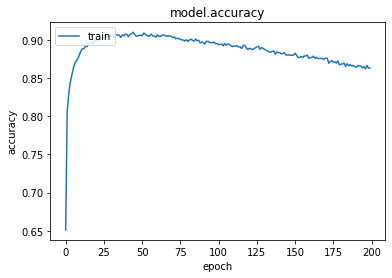

In [12]:
import matplotlib.pyplot as plt  #graph for accuracy

plt.plot(chats.history['accuracy'])
plt.title('model.accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

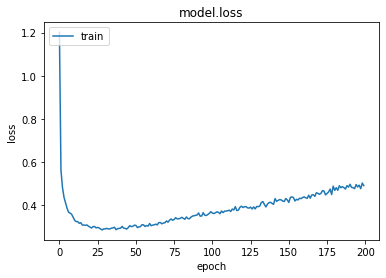

In [13]:
plt.plot(chats.history['loss'])  #graph for loss
plt.title('model.loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
#we need to test

# loss, accuray = model.evaluate(x_test, y_test, batch_size=100)  #we wont update weight or anything just the batch_size specify loss and accuracy

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               24100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 35)                3535      
                                                                 
 dropout_1 (Dropout)         (None, 35)                0         
                                                                 
 dense_2 (Dense)             (None, 75)                2700      
                                                                 
Total params: 30,335
Trainable params: 30,335
Non-trainable params: 0
_________________________________________________________________


In [16]:
#we need to use validation data. track how the network performs 

In [17]:
chats = model.fit(np.array(train_x), np.array(train_y), epochs=100, batch_size=5, validation_split=0.1)

Epoch 1/100
9288/9288 [==============================] - 8s 807us/step - loss: 0.5039 - accuracy: 0.8596 - val_loss: 0.0356 - val_accuracy: 0.9820
Epoch 2/100
9288/9288 [==============================] - 7s 788us/step - loss: 0.5118 - accuracy: 0.8608 - val_loss: 0.0401 - val_accuracy: 0.9828
Epoch 3/100
9288/9288 [==============================] - 7s 804us/step - loss: 0.5053 - accuracy: 0.8621 - val_loss: 0.0388 - val_accuracy: 0.9820
Epoch 4/100
9288/9288 [==============================] - 7s 791us/step - loss: 0.5119 - accuracy: 0.8581 - val_loss: 0.0409 - val_accuracy: 0.9810
Epoch 5/100
9288/9288 [==============================] - 8s 808us/step - loss: 0.5013 - accuracy: 0.8599 - val_loss: 0.0416 - val_accuracy: 0.9828
Epoch 6/100
9288/9288 [==============================] - 7s 776us/step - loss: 0.5186 - accuracy: 0.8564 - val_loss: 0.0486 - val_accuracy: 0.9828
Epoch 7/100
9288/9288 [==============================] - 8s 808us/step - loss: 0.5204 - accuracy: 0.8570 - val_loss: 0

9288/9288 [==============================] - 7s 802us/step - loss: 0.6196 - accuracy: 0.8316 - val_loss: 0.0808 - val_accuracy: 0.9651
Epoch 57/100
9288/9288 [==============================] - 7s 793us/step - loss: 0.6446 - accuracy: 0.8259 - val_loss: 0.0808 - val_accuracy: 0.9762
Epoch 58/100
9288/9288 [==============================] - 7s 789us/step - loss: 0.6601 - accuracy: 0.8244 - val_loss: 0.0883 - val_accuracy: 0.9719
Epoch 59/100
9288/9288 [==============================] - 7s 782us/step - loss: 0.6477 - accuracy: 0.8235 - val_loss: 0.0802 - val_accuracy: 0.9688
Epoch 60/100
9288/9288 [==============================] - 8s 814us/step - loss: 0.6522 - accuracy: 0.8248 - val_loss: 0.0845 - val_accuracy: 0.9754
Epoch 61/100
9288/9288 [==============================] - 7s 801us/step - loss: 0.6868 - accuracy: 0.8188 - val_loss: 0.0863 - val_accuracy: 0.9771
Epoch 62/100
9288/9288 [==============================] - 8s 810us/step - loss: 0.6553 - accuracy: 0.8234 - val_loss: 0.0897 

In [18]:
chats.history.keys()     #validation curve how model perform with unseen data

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

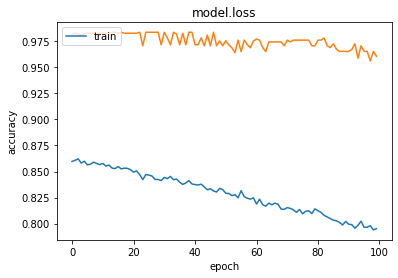

In [19]:
plt.plot(chats.history['accuracy'])         #graph for validation curve(bad)
plt.plot(chats.history['val_accuracy'])
plt.title('model.loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

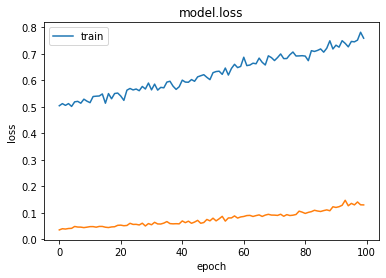

In [20]:
plt.plot(chats.history['loss'])  #loss
plt.plot(chats.history['val_loss'])
plt.title('model.loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [21]:
#high bias
#error on training data set. how much error is there in model while training data
#blue-training orange-validation

# training is less than 6percent. highly bias. not trained well

#variance how much worse it works on testing set

#training acuraccy close to 10 validation is less high variance


In [22]:
import tensorflow as tf
tf.keras.utils.plot_model(model, to_file='simple.png', show_shapes=True)  #?batch size 1 shape of each sample, output provided to the hiden layer where 

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [23]:
model.layers  #print the layers

In [24]:
model.layers[0]  #individual layers

In [26]:
model.get_layer('dropout')

In [27]:
#mean input and output
import random
import numpy as np
x= np.random.rand(100)
y=x
print(x)
print(y)

[0.72984729 0.73448604 0.16929003 0.30385023 0.56036469 0.11373292
 0.16032238 0.20450683 0.44027116 0.64146009 0.97407317 0.08275317
 0.69585922 0.25310118 0.27000077 0.53503828 0.13038332 0.32998199
 0.68874907 0.76641546 0.21233746 0.53553337 0.08875524 0.7448438
 0.03514    0.81952018 0.27673261 0.59397648 0.78115874 0.32764807
 0.77366358 0.09660522 0.57974251 0.6233498  0.0267052  0.90984475
 0.34768292 0.39585609 0.63095301 0.86453037 0.49318509 0.58593943
 0.0130296  0.41970367 0.3460481  0.26972083 0.04353586 0.27045044
 0.01935156 0.37264109 0.67033565 0.42332986 0.21609655 0.97762675
 0.30853085 0.90042671 0.37661104 0.90895756 0.77084956 0.38969885
 0.32870142 0.44463655 0.45119674 0.19327292 0.52102136 0.26234043
 0.24664988 0.71606162 0.32987553 0.36288579 0.88630594 0.88334756
 0.00244393 0.98483346 0.51934665 0.39558224 0.65982316 0.03169612
 0.24553202 0.91970667 0.34954916 0.92037474 0.24883513 0.96718476
 0.05489779 0.35228077 0.38401357 0.4138035  0.79914031 0.40624

In [28]:
#configuration

# model.compile(optimizer='adam', loss=tf.keras.losses.mean_absolute(error))

AttributeError: module 'keras.api._v2.keras.losses' has no attribute 'mean_absolute'

In [29]:
#train model

model.fit(x, y)

ValueError: in user code:

    File "C:\Users\ACER NITRO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ACER NITRO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ACER NITRO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ACER NITRO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\ACER NITRO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ACER NITRO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential" (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer "sequential" (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=True
      • mask=None


In [30]:
#checking weights

weight=model.weights
print(weight)

[<tf.Variable 'dense/kernel:0' shape=(240, 100) dtype=float32, numpy=
array([[-3.59095871e-01, -5.04190266e-01, -3.33273381e-01, ...,
        -8.56756791e-02, -6.29145056e-02, -1.56066096e+00],
       [-8.87623429e-03, -8.27037171e-02, -3.59901786e-03, ...,
        -1.44966155e-01, -5.45813842e-03, -6.87815249e-02],
       [ 6.90472782e-01,  1.56950280e-01,  7.04578310e-02, ...,
        -6.09553695e-01, -2.20457345e-01,  1.66425204e+00],
       ...,
       [ 6.16863482e-02,  8.48809958e-01, -1.60779715e-01, ...,
        -7.22338259e-02, -2.52959013e-01,  4.53562468e-01],
       [ 5.03592908e-01, -1.99974142e-02, -1.60123408e-01, ...,
        -1.39410466e-01,  6.52781188e-01, -1.09621674e-01],
       [-1.37390755e-03,  4.26008217e-02, -3.25800657e-01, ...,
        -2.26313472e-01, -2.98417598e-01, -1.04854247e-02]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(100,) dtype=float32, numpy=
array([-0.45942086, -1.4299103 , -2.0540485 , -0.4095179 ,  0.29823062,
       -0.79707485, -

In [32]:
#getting the weight with the hidden_layer name
model.get_layer('dense').weights

[<tf.Variable 'dense/kernel:0' shape=(240, 100) dtype=float32, numpy=
 array([[-3.59095871e-01, -5.04190266e-01, -3.33273381e-01, ...,
         -8.56756791e-02, -6.29145056e-02, -1.56066096e+00],
        [-8.87623429e-03, -8.27037171e-02, -3.59901786e-03, ...,
         -1.44966155e-01, -5.45813842e-03, -6.87815249e-02],
        [ 6.90472782e-01,  1.56950280e-01,  7.04578310e-02, ...,
         -6.09553695e-01, -2.20457345e-01,  1.66425204e+00],
        ...,
        [ 6.16863482e-02,  8.48809958e-01, -1.60779715e-01, ...,
         -7.22338259e-02, -2.52959013e-01,  4.53562468e-01],
        [ 5.03592908e-01, -1.99974142e-02, -1.60123408e-01, ...,
         -1.39410466e-01,  6.52781188e-01, -1.09621674e-01],
        [-1.37390755e-03,  4.26008217e-02, -3.25800657e-01, ...,
         -2.26313472e-01, -2.98417598e-01, -1.04854247e-02]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(100,) dtype=float32, numpy=
 array([-0.45942086, -1.4299103 , -2.0540485 , -0.4095179 ,  0.29823062,
      

In [34]:
#getting weight of hidden_layer in number probably in an array not tf

model.get_layer('dense').get_weights()

#getting bias model.layers[0].bias
#getting input and output model.layers[0].input same for output

[array([[-3.59095871e-01, -5.04190266e-01, -3.33273381e-01, ...,
         -8.56756791e-02, -6.29145056e-02, -1.56066096e+00],
        [-8.87623429e-03, -8.27037171e-02, -3.59901786e-03, ...,
         -1.44966155e-01, -5.45813842e-03, -6.87815249e-02],
        [ 6.90472782e-01,  1.56950280e-01,  7.04578310e-02, ...,
         -6.09553695e-01, -2.20457345e-01,  1.66425204e+00],
        ...,
        [ 6.16863482e-02,  8.48809958e-01, -1.60779715e-01, ...,
         -7.22338259e-02, -2.52959013e-01,  4.53562468e-01],
        [ 5.03592908e-01, -1.99974142e-02, -1.60123408e-01, ...,
         -1.39410466e-01,  6.52781188e-01, -1.09621674e-01],
        [-1.37390755e-03,  4.26008217e-02, -3.25800657e-01, ...,
         -2.26313472e-01, -2.98417598e-01, -1.04854247e-02]], dtype=float32),
 array([-0.45942086, -1.4299103 , -2.0540485 , -0.4095179 ,  0.29823062,
        -0.79707485, -2.6958516 , -1.4543846 , -1.0478046 , -1.0614816 ,
        -2.6917994 , -1.3455439 , -1.5258836 , -2.722137  , -0.49310

SyntaxError: invalid syntax (2830201818.py, line 1)